# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [6]:
if not os.path.exists("lut.py"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

In [7]:
lut.log

array([  0,  32,  51,  64,  74,  82,  89,  96, 101, 106, 110, 114, 118,
       121, 125, 128, 130, 133, 135, 138, 140, 142, 144, 146, 148, 150,
       152, 153, 155, 156, 158, 159, 161, 162, 163, 165, 166, 167, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 183, 184, 185, 186, 187, 188, 188, 189, 190, 191, 191, 192,
       193, 193, 194, 195, 195, 196, 197, 197, 198, 199, 199, 200, 200,
       201, 202, 202, 203, 203, 204, 204, 205, 205, 206, 206, 207, 207,
       208, 208, 209, 209, 210, 210, 211, 211, 212, 212, 213, 213, 214,
       214, 214, 215, 215, 216, 216, 217, 217, 217, 218, 218, 219, 219,
       219, 220, 220, 221, 221, 221, 222, 222, 222, 223, 223, 223, 224,
       224, 225, 225, 225, 226, 226, 226, 227, 227, 227, 228, 228, 228,
       229, 229, 229, 229, 230, 230, 230, 231, 231, 231, 232, 232, 232,
       233, 233, 233, 233, 234, 234, 234, 235, 235, 235, 235, 236, 236,
       236, 236, 237, 237, 237, 238, 238, 238, 238, 239, 239, 23

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

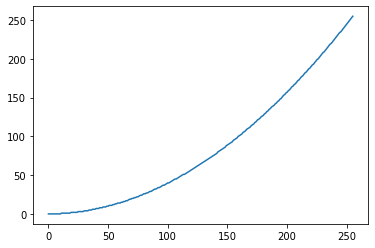

In [8]:
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

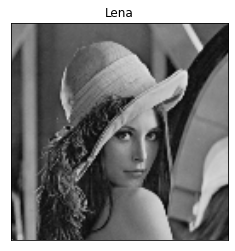

In [101]:
if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

I = cv2.imread("lena.bmp")
plt.imshow(I)
plt.title("Lena")
plt.xticks([])
plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

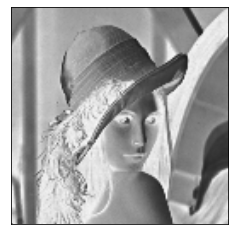

In [19]:
I_odwrotna = cv2.LUT(I, lut.odwrotna)
plt.figure()
plt.imshow(I_odwrotna)
plt.xticks([])
plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [28]:
def LUT(image, codingMatrix):
    transformedImage = cv2.LUT(image, codingMatrix)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))
    ax1.plot(codingMatrix)
    ax1.set_title("Wykres przeksztalcenia")

    ax2.imshow(image)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title("Obraz oryginalny")

    ax3.imshow(transformedImage)
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_title("Obraz przeksztalcony")


Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

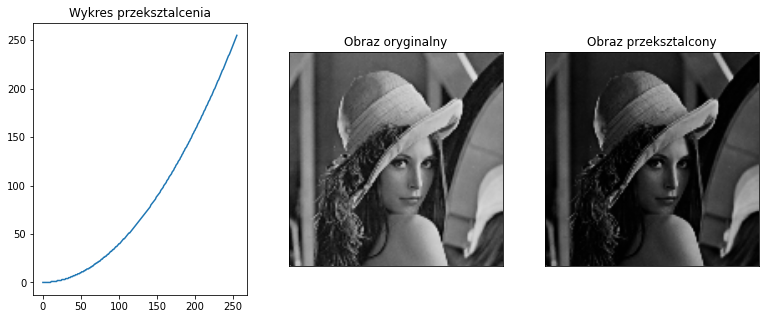

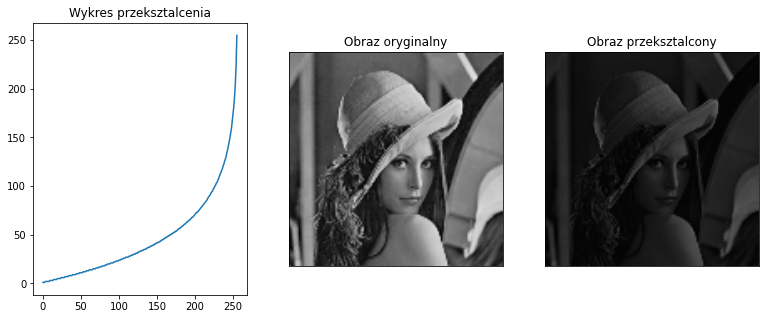

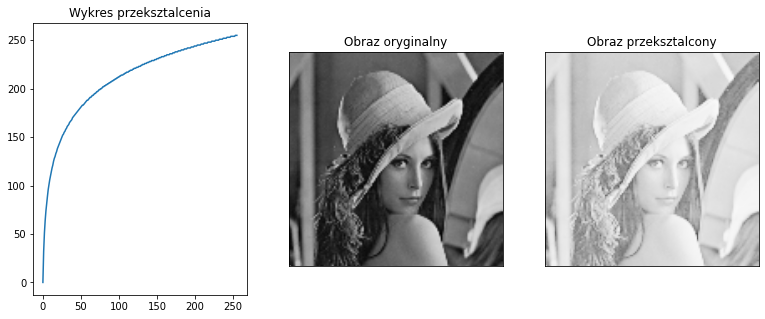

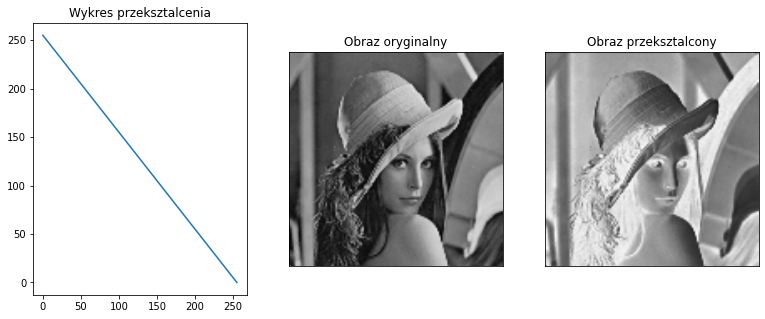

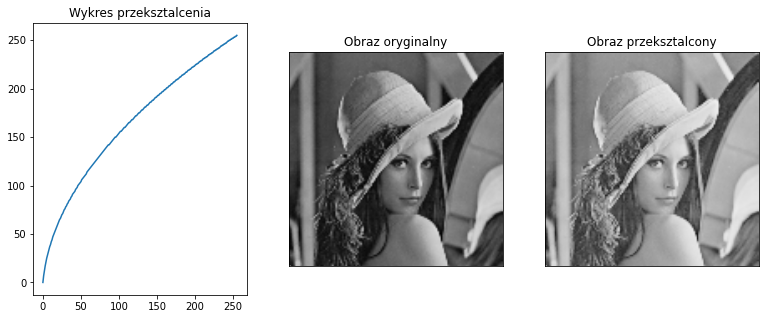

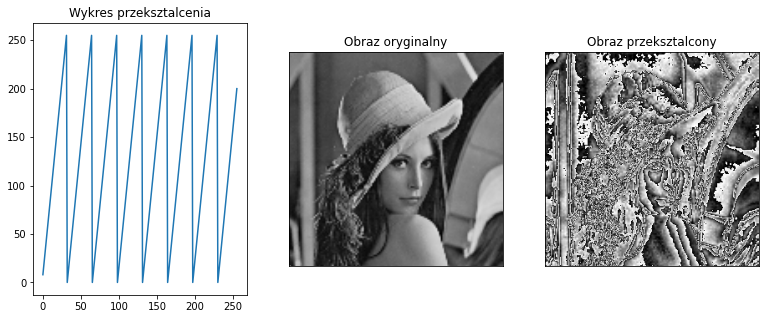

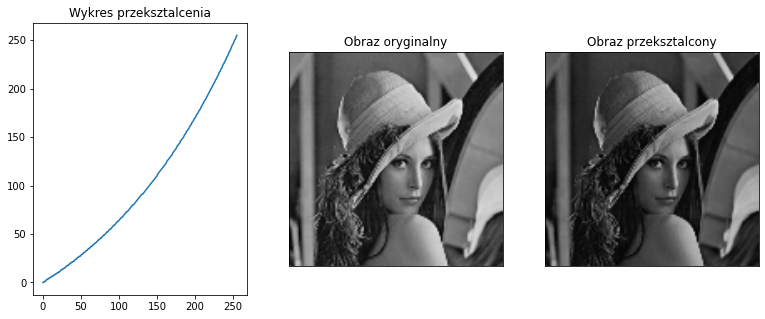

In [29]:
transformations = [lut.kwadratowa, lut.odwlog, lut.log, lut.odwrotna, lut.pierwiastkowa, lut.pila, lut.wykladnicza]

for tr in transformations:
    LUT(I, tr)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

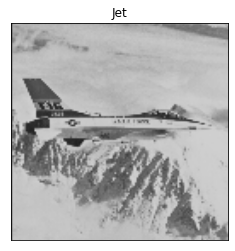

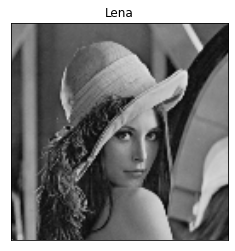

In [103]:
lena = cv2.imread("lena.bmp")
jet = cv2.imread("jet.bmp")

plt.imshow(jet)
plt.title("Jet")
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(lena)
plt.title("Lena")
plt.xticks([])
plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

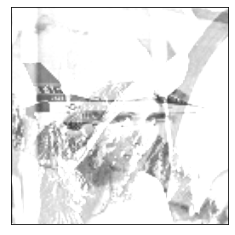

In [33]:
jetPlusLena = cv2.add(lena, jet)

plt.imshow(jetPlusLena)
plt.title("Jet plus Lena")
plt.xticks([])
plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

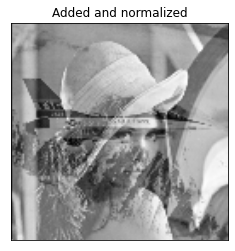

In [102]:
# Wynik dodawania nie jest satysfakcjonujacy poniewaz wartosci sa poza skala.

jetPlusLena2 = cv2.add(lena.astype('uint16'), jet.astype('uint16'))

normalizedImage = cv2.normalize(jetPlusLena2, np.zeros((800, 800)), 0, 255, cv2.NORM_MINMAX)

plt.imshow(normalizedImage.astype('uint8'))
plt.title("Added and normalized")
plt.xticks([])
plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

[]

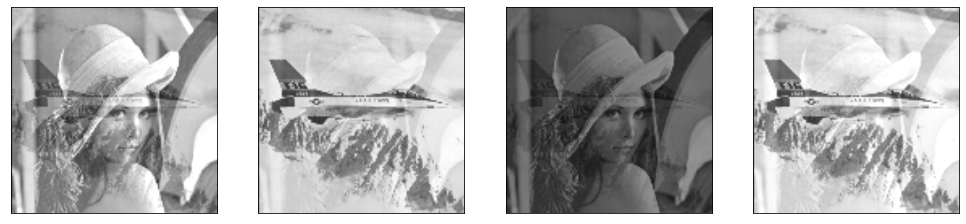

In [75]:
weightedIm1 = cv2.addWeighted(lena, 0.8, jet, 0.5, 2)
weightedIm2 = cv2.addWeighted(lena, 0.2, jet, 1, 5)
weightedIm3 = cv2.addWeighted(lena, 0.5, jet, 0.2, 0.2)
weightedIm4 = cv2.addWeighted(lena, 0.3, jet, 1, 6)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(17, 5))

ax1.imshow(weightedIm1)
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(weightedIm2)
ax2.set_xticks([])
ax2.set_yticks([])

ax3.imshow(weightedIm3)
ax3.set_xticks([])
ax3.set_yticks([])

ax4.imshow(weightedIm4)
ax4.set_xticks([])
ax4.set_yticks([])


### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

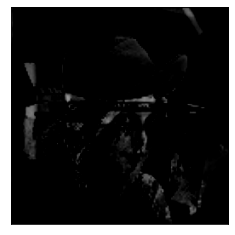

In [77]:
subtractLenaJet = cv2.subtract(lena, jet)
plt.imshow(subtractLenaJet)
plt.title("Substracted images")
plt.xticks([])
plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

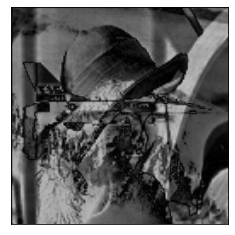

In [79]:
# Wyniki odejmowania nie sa satysfakcjonujace poniewaz wystepuja wartosci ujemne.
absSubtractLenaJet = abs(cv2.subtract(lena.astype("int16"), jet.astype("int16")))
plt.imshow(absSubtractLenaJet)
plt.xticks([])
plt.yticks([])
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

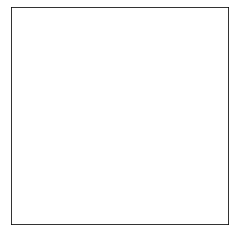

In [82]:
# Nie daje on satysfakcjonujacych wynikow poniewaz wartosci sa poza skala.
mulLenaJet = cv2.multiply(lena, jet)
plt.imshow(mulLenaJet)
plt.xticks([])
plt.yticks([])
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

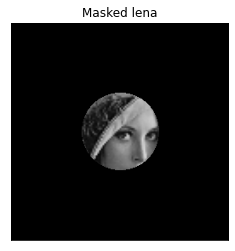

In [104]:
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

kolo = cv2.imread("kolo.bmp")

koloMask = kolo.astype("bool").astype("uint8")
maskLena = cv2.multiply(lena, koloMask)
plt.imshow(maskLena)
plt.title("Masked lena")
plt.xticks([])
plt.yticks([])
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

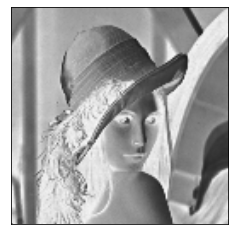

In [87]:
bitwiseLena1 = cv2.bitwise_not(lena)

plt.imshow(bitwiseLena1)
plt.xticks([])
plt.yticks([])
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

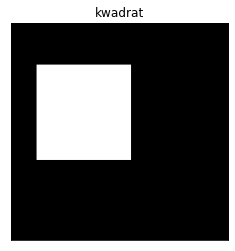

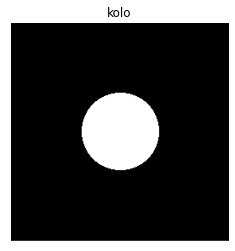

In [106]:
if not os.path.exists("kwadrat.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

kwadrat = cv2.imread("kwadrat.bmp")

plt.imshow(kwadrat)
plt.title("kwadrat")
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(kolo)
plt.title("kolo")
plt.xticks([])
plt.yticks([])
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

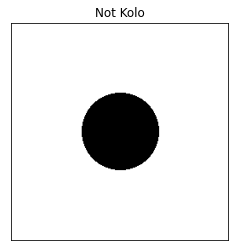

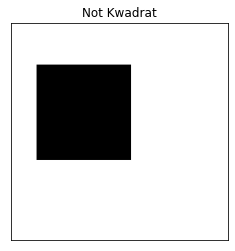

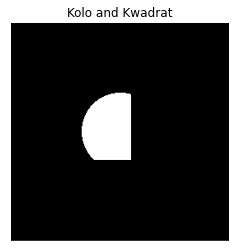

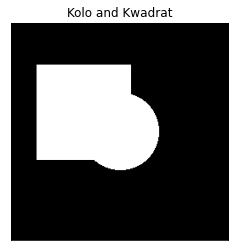

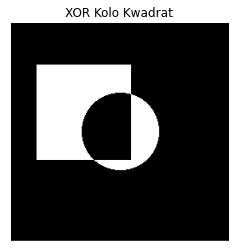

In [100]:
notKwadrat = ~kwadrat
notKolo = ~kolo

andKoloKwadrat = kolo & kwadrat
orKoloKwadrat =  kolo | kwadrat
xorKoloKwadrat = kolo ^ kwadrat


plt.imshow(notKolo)
plt.title("Not Kolo")
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(notKwadrat)
plt.title("Not Kwadrat")
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(andKoloKwadrat)
plt.title("Kolo and Kwadrat")
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(orKoloKwadrat)
plt.title("Kolo and Kwadrat")
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(xorKoloKwadrat)
plt.title("XOR Kolo Kwadrat")
plt.xticks([])
plt.yticks([])
plt.show()